### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [10]:
cotacoes_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2022-01-01', end='2022-11-10')['Adj Close']

display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2022-01-03,99.930000,109.550003,6.72,17.510675,21.096741,13.44,14.242403,19.707718,25.740183,98.327232,92.533485,130.274933,94.242409
2022-01-04,99.570000,107.000000,6.61,17.625483,21.695026,12.91,14.018260,19.257143,24.080488,98.832901,93.599937,127.581924,94.091103
2022-01-05,97.099998,102.169998,6.42,17.500856,21.283091,12.40,13.065653,18.424559,22.967400,99.108711,89.657883,127.705627,91.916130
2022-01-06,97.849998,101.830002,6.25,17.750107,21.714640,12.21,13.018956,18.224457,22.709003,99.016769,91.933609,127.429649,91.868851
2022-01-07,98.699997,101.949997,6.22,18.008257,22.195225,11.93,12.766796,18.362673,21.973570,99.283386,93.247612,127.068062,91.651352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,114.000000,115.500000,4.83,19.400000,30.350000,14.21,14.180000,29.410000,14.350000,102.080002,107.540001,144.509995,107.089996
2022-11-07,111.220001,110.580002,4.54,18.760000,29.660000,13.72,13.480000,28.440001,13.420000,102.059998,108.279999,143.899994,106.559998
2022-11-08,112.300003,111.180000,4.63,18.580000,29.570000,13.86,12.390000,28.629999,13.090000,101.199997,108.400002,144.169998,106.989998


### Será que todos os dados vieram corretos?

In [11]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2022-01-03 to 2022-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  216 non-null    float64
 1   SMAL11  216 non-null    float64
 2   MGLU3   216 non-null    float64
 3   BBDC4   216 non-null    float64
 4   ITUB4   216 non-null    float64
 5   ENEV3   216 non-null    float64
 6   MOVI3   216 non-null    float64
 7   BPAC11  216 non-null    float64
 8   NTCO3   216 non-null    float64
 9   BCRI11  216 non-null    float64
 10  VILG11  216 non-null    float64
 11  KNRI11  216 non-null    float64
 12  XPLG11  216 non-null    float64
dtypes: float64(13)
memory usage: 23.6 KB


### Ajustando os dados

In [ ]:
#df_media = cotacoes_carteira.mean()
#cotacoes_carteira = cotacoes_carteira.fillna(df_media) -Preenche campos vazios com a média
# cotacoes_carteira = cotacoes_carteira.ffill() - Preenche com o valor anterior os campos vazios
# cotacoes_carteira,info()

### Vamos ver como que as ações foram individualmente

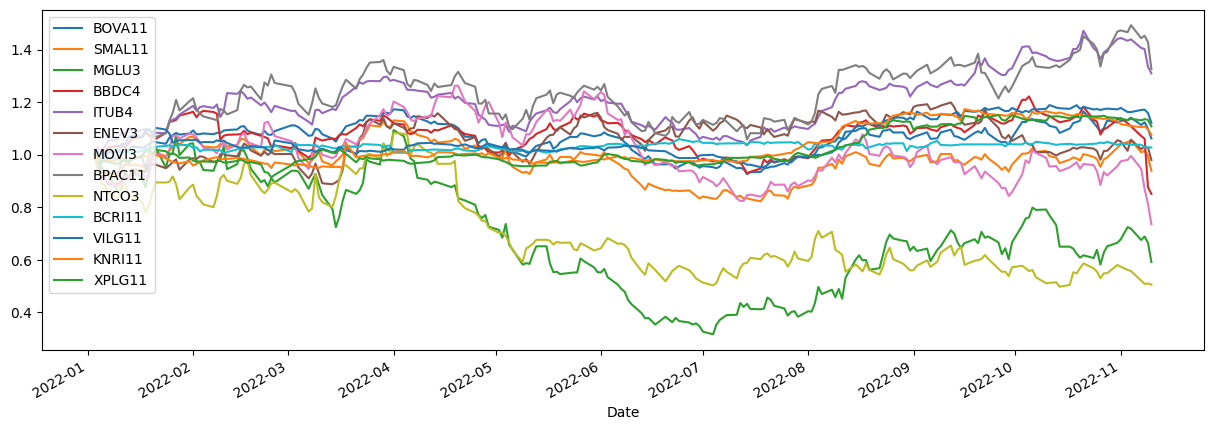

In [13]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15,5))
plt.legend(loc='upper left')

### Vamos puxar o IBOV para comparar

In [15]:
cotacao_ibov = web.DataReader('^BVSP', data_source='yahoo', start='2022-01-01', end='2022-11-10')
display(cotacao_ibov)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,106125,103413,104823,103922,11128500,103922
2022-01-04,104276,103096,103922,103514,11491600,103514
2022-01-05,103514,100850,103514,101006,0,101006
2022-01-06,102235,101000,101006,101561,11749200,101561
2022-01-07,102719,101104,101561,102719,11733200,102719
...,...,...,...,...,...,...
2022-11-04,120039,116904,116907,118155,16209500,118155
2022-11-07,118240,115266,118148,115342,15221900,115342
2022-11-08,117072,114688,115340,116160,14239800,116160


### Criando um dataframe da Carteira com as quantidades de ações

In [14]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']== ativo, 'Qtde'].values[0]
    
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2022-01-03,9993.000031,10955.000305,6719.999790,1751.067543,2109.674072,4031.999874,1424.240303,1970.771790,2574.018288,9832.723236,9253.348541,13027.493286,9424.240875
2022-01-04,9956.999969,10700.000000,6610.000134,1762.548256,2169.502640,3872.999954,1401.826000,1925.714302,2408.048820,9883.290100,9359.993744,12758.192444,9409.110260
2022-01-05,9709.999847,10216.999817,6420.000076,1750.085640,2128.309059,3719.999886,1306.565285,1842.455864,2296.739960,9910.871124,8965.788269,12770.562744,9191.613007
2022-01-06,9784.999847,10183.000183,6250.000000,1775.010681,2171.463966,3663.000011,1301.895618,1822.445679,2270.900345,9901.676941,9193.360901,12742.964935,9186.885071
2022-01-07,9869.999695,10194.999695,6219.999790,1800.825691,2219.522476,3579.000092,1276.679611,1836.267281,2197.356987,9928.338623,9324.761200,12706.806183,9165.135193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,11400.000000,11550.000000,4829.999924,1939.999962,3035.000038,4263.000011,1418.000031,2940.999985,1435.000038,10208.000183,10754.000092,14450.999451,10708.999634
2022-11-07,11122.000122,11058.000183,4539.999962,1876.000023,2965.999985,4116.000080,1347.999954,2844.000053,1342.000008,10205.999756,10827.999878,14389.999390,10655.999756
2022-11-08,11230.000305,11118.000031,4630.000114,1857.999992,2956.999969,4157.999897,1239.000034,2862.999916,1309.000015,10119.999695,10840.000153,14416.999817,10698.999786


### Comparação Carteira x IBOV

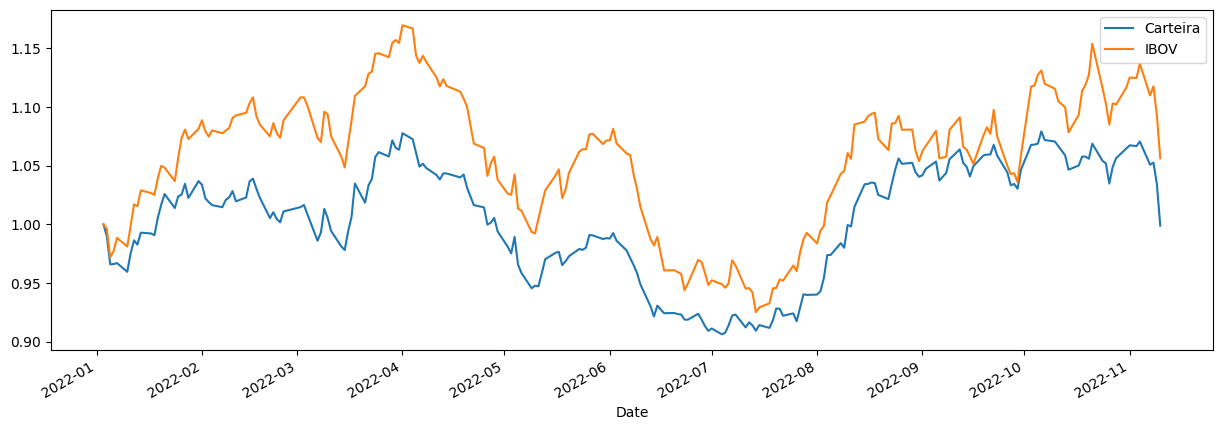

In [16]:
valor_investido['Total']= valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15,5), label='Carteira')
cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()

In [17]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno da Carteira: {:.2%}'.format(retorno_carteira))
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno da Carteira: -0.12%
Retorno IBOV: 5.63%


### Correlação da Carteira com o IBOV

In [18]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(correlacao)

0.9127236168565097
